# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ToBigs/02. Optimization, Regression/Optimization/과제/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0])
print(N)

3


In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters, random_parameters

(array([0.12241344, 0.42302377, 0.58253447]),
 array([0.12241344, 0.42302377, 0.58253447]))

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i\theta$

In [ ]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
      z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-z}}$

In [ ]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [ ]:
logistic(X_train.iloc[1], parameters)

0.6569086184152891

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\sum\{y_i \log p(X_i) + (1 - y_i) \log(1 - p(X_i))\}$

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

In [ ]:
def mse_i(X, y, parameters):
    pred = dot_product(X, parameters)
    loss = (y - pred)**2
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n: 현재 배치의 데이터 수
    loss = 0
    for i in range(len(X_set)):
      X = X_set.iloc[i, :]
      y = y_set.iloc[i]
      loss += loss_function(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.21028302414165

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.9644442801404759

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= - \sum X_{ij} (y_i - \theta^T X_i)$

## ${\partial\over{\partial \theta_j}}l(p) = -\sum X_{ij} (y_i - p(X_i))$

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
      pred = dot_product(X, parameters)
      gradient = -(y - pred) * X[j]

    else:
      p = logistic(X, parameters)
      gradient = (p - y) * X[j]
    return gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')

-0.2751008442870624

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1153653383679998

In [ ]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

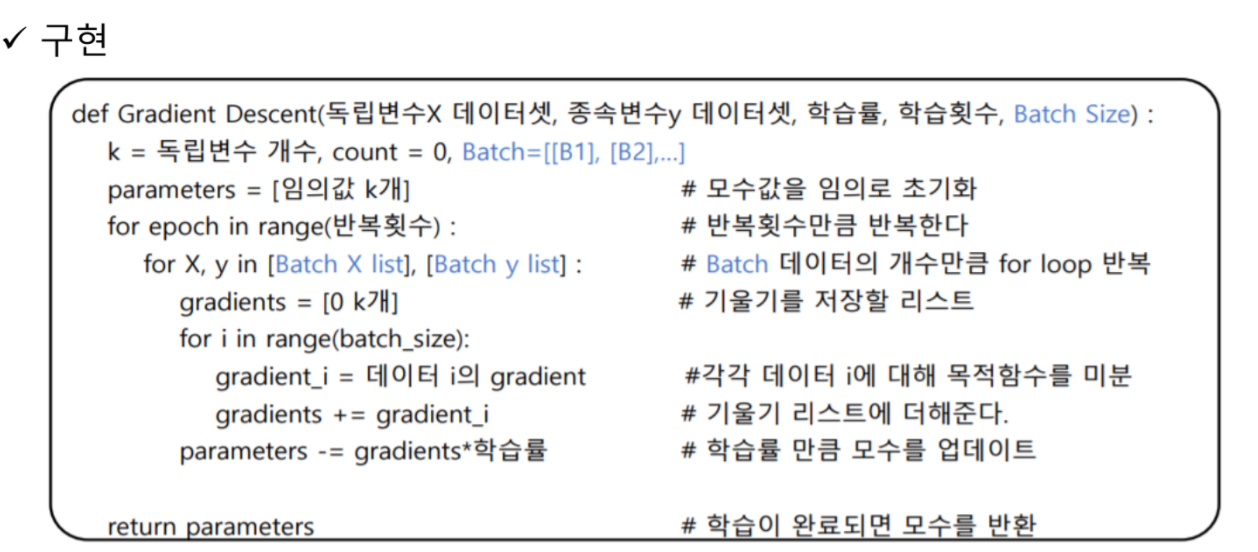

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    for i in range(len(X_set)):
      X = X_set.iloc[i, :]
      y = y_set.iloc[i]
      for j in range(len(parameters)):
        gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[-23.637983914862623, 110.23691068626673, 148.53372818328685]

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[36.41948913673482, 9.789255284869123, 42.72671530060023]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 부여된 batch_size만큼의 batch를 만들고, 각 batch에 있는 인덱스 리스트를 return한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수
    for i in range(len(parameters)):
      parameters[i] -= learning_rate * gradients[i]/n
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([-0.24906535,  0.32317337,  0.14672197])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 가중치를 업데이트할 때 사용되는 스케일링 파라미터, 학습 속도 조절
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 한번에 업데이트 하려고 하는 양  
- epoch: 데이터를 모두 사용할 시 1 epoch
- num_epoch: 전체 데이터를 학습한 횟수
<br>

BGD: Batch_size = 전체 데이터 세트를 사용

SGD: Batch_size = 1개의 데이터 사용

MGD: Batch_size = BGD와 MGD 사이 사용

<br>

batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD

batch_size=k -> MGD

batch_size=whole -> BGD

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9487248333005547  params: [0.27063732 0.34404486 0.87847731]  gradients: [40.873833571423205, 12.572769881670007, 48.17185019227149]
epoch: 100  loss: 0.4752094417586201  params: [-0.82925352  0.71339788 -0.62052474]  gradients: [4.921054568505962, -10.218960241396546, 11.261184676136697]
epoch: 200  loss: 0.4022089046312653  params: [-1.01919108  1.2926262  -1.21023951]  gradients: [1.851446537175234, -7.276797958522614, 7.163109432802368]
epoch: 300  loss: 0.36715251286787326  params: [-1.12225889  1.70812932 -1.61651363]  gradients: [1.3437426002088717, -5.37114429058801, 5.2240906682042985]
epoch: 400  loss: 0.3471086081787034  params: [-1.2034544   2.02365284 -1.92230186]  gradients: [1.1107914920341788, -4.191690654659534, 4.048192774247913]
epoch: 500  loss: 0.3344476042059417  params: [-1.27157035  2.27486906 -2.16422885]  gradients: [0.941438961643656, -3.4004293888281993, 3.2655386255127956]
epoch: 600  loss: 0.3259016872237474  params: [-1.32965564  2.48154

array([-1.4950696 ,  3.04698073, -2.89925371])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.27866767374387713  params: [-0.86973561  1.09204205 -1.22190729]  gradients: [0.2515991394459475, 0.13692049233303244, 0.17702282515639373]
epoch: 100  loss: 0.07736671323221499  params: [-1.93032569  4.17501953 -4.06769116]  gradients: [0.07538543275096975, 0.04102482460683845, 0.05304049254938317]
epoch: 200  loss: 0.07736266552150214  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.0753815952180121, 0.041022736217732426, 0.053037792496722864]
epoch: 300  loss: 0.07736266518361716  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.07538159489767121, 0.041022736043402605, 0.053037792271333976]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0753815948976457, 0.04102273604338872, 0.053037792271316025]
epoch: 600  loss: 0.07736266518359

array([-1.9303681 ,  4.17514311, -4.06780375])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 0.9599122986971782  params: [0.28463083 0.35107992 0.04466791]  gradients: [3.053076530856211, 2.7803497340590053, 3.6238693904792076]
epoch: 100  loss: 0.19809020049464823  params: [-1.56279636  3.07534392 -3.02264455]  gradients: [0.4442906651662181, 0.654689036352567, 0.8705851468927218]


array([-1.6967844 ,  3.53706507, -3.43579491])

### Predict Label

In [ ]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.17175003, 3.05181462])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 2.044345622293687  params: [0.74802081 1.35380233]  gradients: [1.859103269457553, -0.7222820941901478]
epoch: 100  loss: 1.4394129060147005  params: [0.03233618 3.13543244]  gradients: [3.2905888475189338, 0.8131455938374699]
epoch: 200  loss: 1.4386009867661886  params: [0.030922   3.13817755]  gradients: [3.290654515757359, 0.8144014841900439]
epoch: 300  loss: 1.4385996738136815  params: [0.03091971 3.138182  ]  gradients: [3.2906546220220405, 0.8144035164782578]
epoch: 400  loss: 1.438599671689058  params: [0.03091971 3.138182  ]  gradients: [3.2906546221939985, 0.8144035197669166]
epoch: 500  loss: 1.43859967168562  params: [0.03091971 3.138182  ]  gradients: [3.2906546221942756, 0.8144035197722369]
epoch: 600  loss: 1.4385996716856155  params: [0.03091971 3.138182  ]  gradients: [3.2906546221942765, 0.8144035197722441]
epoch: 700  loss: 1.4385996716856155  params: [0.03091971 3.138182  ]  gradients: [3.2906546221942765, 0.8144035197722441]
epoch: 800  loss: 1.438

array([0.03091971, 3.138182  ])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

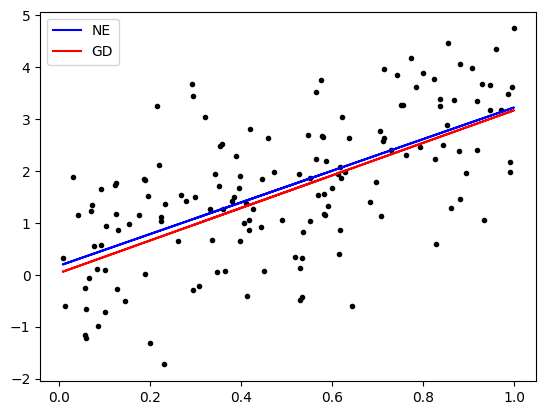

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()